<center><h2>Problem Set 3</h2>Chen Liu, 58426556</center>

---
### Question 0

---

#### Data Files

Urls for all data files are in the hyperlinks below.

[URL for RECS 2009][1], [URL for RECS 2009 replicate weights][2],
[URL for RECS 2015][3] 

#### Variables

Variables need for all files are in the table below. 

`brr_weight_*` refers to all variables begin with
`brr_weight_` and `BRRWT*` refers to all variables 
begin with `BRRWT`. 

| File | Variables Need |
| ----------- | ----------- |
RECS 2009 | `DOEID`, `REGIONC`, `NWEIGHT`, `HDD65`, `CDD65` 
RECS 2009 replicate weights | `brr_weight_*` 
RECS 2015 | `DOEID`, `REGIONC`, `NWEIGHT`, `HDD65`, `CDD65`, `BRRWT*` 

#### Weights and Replicate Weights

The links for documents explaining how to use the replicate 
weights are as below.

[URL for Document 2009][4], [URL for Document 2015][5]

According to these documents, estimate standard errors can be
calculated by 

$\displaystyle\sqrt{\frac{1}{R(1-\epsilon)^2}
\sum_{r=1}^R(\hat{\theta}_r-\hat{\theta})^2}$

where $R$ is the number of replicate subsamples, $\epsilon$ is 
Fay coefficient, $\hat{\theta}$ is the estimate from the full sample, 

$\hat{\theta}_r$ is the estimate from the $r$-th replicate 
subsample by using replicate weights.

In this case, $R = 244$ for RECS 2009 data, $R = 96$ for RECS 2015,
$\epsilon = 0.5$.

[1]: https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv
[2]: https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv
[3]: https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv
[4]: https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf
[5]: https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf

---

### Question 1

---

#### Import modules and set matplotlib

In [1]:
import os
import pandas as pd
from scipy.stats import norm
from IPython.display import Markdown
from matplotlib import pyplot as plt

### Display settings for matplotlib
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['figure.dpi'] = 60

#### Define variables to facilitate data process

In [2]:
### Saving names
data_2009_name = 'recs2009.csv'
rep_2009_name = 'recs2009_repweights.csv'
data_2015_name = 'recs2015.csv'
rep_2015_name = 'recs2015_repweights.csv'

### Original urls
base_url = 'https://www.eia.gov/consumption/residential/data/%s/csv/%s'
raw_data_2009_name = 'recs2009_public.csv'
raw_rep_2009_name = 'recs2009_public_repweights.csv'
raw_data_2015_name = 'recs2015_public_v4.csv'

### Interested columns and new names
names = {
    'DOEID' : 'id',
    'REGIONC' : 'census_region',
    'NWEIGHT' : 'nweight',
    'HDD65' : 'heating_degree_days',
    'CDD65' : 'cooling_degree_days'
}

### Categorical types of census region
region_trans = {
    1 : 'Northeast',
    2 : 'Midwest',
    3 : 'South',
    4 : 'West'
}

### Types of columns
demo_type = [
    (['id', 'heating_degree_days', 'cooling_degree_days'], 'int'), 
    (['census_region'], pd.CategoricalDtype()),
    (['nweight'], 'float')
]

#### Process RECS 2009 data

In [3]:
### If processed data exist, read from local folder, else download
if not (os.path.exists(data_2009_name) and os.path.exists(rep_2009_name)):
    
    ### Read data and replicate weights from urls
    raw_data_2009 = pd.read_csv(base_url % ('2009', raw_data_2009_name), 
                                low_memory=False)
    raw_rep_2009 = pd.read_csv(base_url % ('2009', raw_rep_2009_name),
                               low_memory=False)
    
    ### Select interested columns and rename
    data_2009 = raw_data_2009[names.keys()].copy()
    data_2009.rename(columns=names, inplace=True)
    
    ### Replace categorical types with meaningful words
    data_2009 = data_2009.replace({'census_region' : region_trans})
    
    ### Change into proper types
    for type_item in demo_type:
        cols, to_type = type_item
        for col in cols:
            data_2009[col] = data_2009[col].astype(to_type)
    
    ### Convert replicate weights to long format and rename
    raw_rep_2009.rename(columns={'DOEID' : 'id'}, inplace=True)
    rep_2009 = pd.wide_to_long(raw_rep_2009.drop(columns=['NWEIGHT']), 
                               stubnames='brr_weight_', i='id', j='rep')
    rep_2009.rename(columns={'brr_weight_' : 'weight'}, inplace=True)
    rep_2009.reset_index(inplace=True)
    
    ### Store into local folder
    data_2009.to_csv(data_2009_name, index=False)
    rep_2009.to_csv(rep_2009_name, index=False)
    
else:
    
    data_2009 = pd.read_csv(data_2009_name)
    rep_2009 = pd.read_csv(rep_2009_name)
    
    ### Change into proper types
    for type_item in demo_type:
        cols, to_type = type_item
        for col in cols:
            data_2009[col] = data_2009[col].astype(to_type)

#### Process RECS 2015 data

In [4]:
### If processed data exist, read from local folder, else download
if not (os.path.exists(data_2015_name) and os.path.exists(rep_2015_name)):
    
    ### Read data from url
    raw_data_2015 = pd.read_csv(base_url % ('2015', raw_data_2015_name), 
                                low_memory=False)
    
    ### Select interested columns and rename
    data_2015 = raw_data_2015[names.keys()].copy()
    data_2015.rename(columns=names, inplace=True)
    
    ### Replace categorical types with meaningful words
    data_2015 = data_2015.replace({'census_region' : region_trans})
    
    ### Change into proper types
    for type_item in demo_type:
        cols, to_type = type_item
        for col in cols:
            data_2015[col] = data_2015[col].astype(to_type)
            
    ### Convert replicate weights to long format and rename
    raw_data_2015.rename(columns={'DOEID' : 'id'}, inplace=True)
    items = list(raw_data_2015.filter(regex=('BRRWT*')).columns)
    items.append('id')
    rep_2015 = pd.wide_to_long(raw_data_2015.filter(items=items), 
                               stubnames='BRRWT', i='id', j='rep')
    rep_2015.rename(columns={'BRRWT' : 'weight'}, inplace=True)
    rep_2015.reset_index(inplace=True)
    
    ### Store into local folder
    data_2015.to_csv(data_2015_name, index=False)
    rep_2015.to_csv(rep_2015_name, index=False)
    
else:
    
    data_2015 = pd.read_csv(data_2015_name)
    rep_2015 = pd.read_csv(rep_2015_name) 
    
    ### Change into proper types
    for type_item in demo_type:
        cols, to_type = type_item
        for col in cols:
            data_2015[col] = data_2015[col].astype(to_type)

#### Show result for part a

In [5]:
data_2009

,id,census_region,nweight,heating_degree_days,cooling_degree_days
0,1,Midwest,2471.68,4742,1080
1,2,West,8599.17,2662,199
2,3,Northeast,8969.92,6233,505
3,4,Midwest,18003.64,6034,672
4,5,Northeast,5999.61,5388,702
...,...,...,...,...,...
12078,12079,Midwest,10219.80,7671,332
12079,12080,South,8689.07,2085,2844
12080,12081,Midwest,4697.21,7935,472
12081,12082,West,13155.68,5834,770


In [6]:
data_2015

,id,census_region,nweight,heating_degree_days,cooling_degree_days
0,10001,West,12085.16227,2031,1768
1,10002,South,14410.19627,1915,2795
2,10003,South,23325.95385,2263,2235
3,10004,Midwest,12165.33319,3754,1374
4,10005,Northeast,16717.67092,5401,993
...,...,...,...,...,...
5681,15682,Midwest,14190.77054,6470,632
5682,15683,South,13617.68710,2512,2055
5683,15684,Midwest,20365.17745,5941,937
5684,15685,South,15110.19635,1438,3464


In [7]:
data_2009.info()
print('\n')
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   12083 non-null  int32   
 1   census_region        12083 non-null  category
 2   nweight              12083 non-null  float64 
 3   heating_degree_days  12083 non-null  int32   
 4   cooling_degree_days  12083 non-null  int32   
dtypes: category(1), float64(1), int32(3)
memory usage: 248.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   5686 non-null   int32   
 1   census_region        5686 non-null   category
 2   nweight              5686 non-null   float64 
 3   heating_degree_days  5686 non-null   int32   
 4   cooling_degree_days  5686 non-null   int32   
dtype

#### Show result for part b

In [8]:
rep_2009

,id,rep,weight
0,1,1,3628.305158
1,2,1,4408.308000
2,3,1,13664.732100
3,4,1,9456.435434
4,5,1,8659.554041
...,...,...,...
2948247,12079,244,15669.237850
2948248,12080,244,3976.693639
2948249,12081,244,2479.082636
2948250,12082,244,17663.466590


In [9]:
rep_2015

,id,rep,weight
0,10001,1,16555.311270
1,10002,1,21486.287200
2,10003,1,12297.436760
3,10004,1,18553.958900
4,10005,1,8075.744168
...,...,...,...
545851,15682,96,20183.445250
545852,15683,96,19681.916720
545853,15684,96,29148.112150
545854,15685,96,20695.042680


---

### Question 2

---

#### Part a

In [10]:
def weight_mean(data, rep):
    '''
    Compute mean, variance and standard error of heating 
    degree days and cooling degree days of different census 
    region using data and replicate weights.

    Parameters
    ----------
    data : pandas.core.frame.DataFrame
        Data contains id, census region, weight, heating 
        degree days and cooling degree days.
    rep : pandas.core.frame.DataFrame
        Rep contains id and replicate weights.

    Returns
    -------
    2 pandas.core.frame.DataFrame for heating degree days 
    and cooling degree days respectively with mean, variance 
    and standard error as columns.
    '''
    
    ### Compute weighted mean for heating/cooling degree days
    mean_hd = (data.groupby('census_region', as_index=False)               
                   .apply(lambda x : 
                          (x['heating_degree_days'] * x['nweight'])
                                     .sum() / x['nweight'].sum()))
    mean_hd.columns = ['census_region', 'mean']

    mean_cd = (data.groupby('census_region', as_index=False)               
                   .apply(lambda x : 
                          (x['cooling_degree_days'] * x['nweight'])
                                     .sum() / x['nweight'].sum()))
    mean_cd.columns = ['census_region', 'mean']
    
    
    ### Compute replicate weighted mean for heating/cooling degree days
    mean_hd_rep = (data.merge(rep, on='id')
                       .groupby(['census_region', 'rep'], as_index=False)               
                       .apply(lambda x : 
                              (x['heating_degree_days'] * x['weight'])
                                     .sum() / x['weight'].sum()))
    mean_hd_rep.columns = ['census_region', 'rep', 'rep_mean']

    mean_cd_rep = (data.merge(rep, on='id')
                       .groupby(['census_region', 'rep'], as_index=False)               
                       .apply(lambda x : 
                              (x['cooling_degree_days'] * x['weight'])
                                     .sum() / x['weight'].sum()))
    mean_cd_rep.columns = ['census_region', 'rep', 'rep_mean']
    

    ### Compute variance for heating/cooling degree days
    epsilon = 0.5
    var_hd = (mean_hd.merge(mean_hd_rep, on='census_region')
                     .groupby('census_region')
                     .apply(lambda x : ((x['rep_mean'] - x['mean']) ** 2)
                                   .mean() / (1 - epsilon) ** 2))

    var_cd = (mean_cd.merge(mean_cd_rep, on='census_region')
                     .groupby('census_region')
                     .apply(lambda x : ((x['rep_mean'] - x['mean']) ** 2)
                                   .mean() / (1 - epsilon) ** 2))
    
    
    ### Construct return format 
    mean_hd = pd.Series(data=list(mean_hd['mean']), 
                        index=list(mean_hd['census_region']))
    mean_cd = pd.Series(data=list(mean_cd['mean']), 
                        index=list(mean_cd['census_region']))
    
    hd = pd.DataFrame({
            'mean' : mean_hd, 
            'var' : var_hd, 
            'se' : var_hd ** 0.5
        })
    cd = pd.DataFrame({
            'mean' : mean_cd, 
            'var' : var_cd, 
            'se' : var_cd ** 0.5
        })
    
    return hd, cd

In [11]:
### Get means, variances and standard errors
hd_2009, cd_2009 = weight_mean(data_2009, rep_2009)
hd_2015, cd_2015 = weight_mean(data_2015, rep_2015)

### 97.5% z-score
z = norm.ppf(0.975)
### Output format function
show_format = (lambda x : '%.2f, 95%%CI[%.2f, %.2f]' 
               % (x['mean'], x['lwr'], x['upr']))

for stat in ['hd_2009', 'cd_2009', 'hd_2015', 'cd_2015']:
    
    ### Compute 95% confidence interval
    exec("%s['lwr'] = %s['mean'] - z * %s['se']" % (stat, stat, stat))
    exec("%s['upr'] = %s['mean'] + z * %s['se']" % (stat, stat, stat))
    
    ### Format output column as 'mean, 95%CI[lwr, upr]'
    exec("%s['show'] = %s.apply(show_format, axis=1)" % (stat, stat))

#### Result for RECS 2009

In [12]:
show_2009 = pd.concat([hd_2009['show'], cd_2009['show']], axis=1)
show_2009.columns = ['heating_degree_days', 'cooling_degree_days']
Markdown(show_2009.to_html(classes='text-align : center'))

<table border="1" class="dataframe text-align : center">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>heating_degree_days</th>
      <th>cooling_degree_days</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Midwest</th>
      <td>6325.34, 95%CI[6233.76, 6416.91]</td>
      <td>660.89, 95%CI[631.99, 689.79]</td>
    </tr>
    <tr>
      <th>Northeast</th>
      <td>5700.99, 95%CI[5632.20, 5769.77]</td>
      <td>680.72, 95%CI[660.12, 701.31]</td>
    </tr>
    <tr>
      <th>South</th>
      <td>2696.67, 95%CI[2615.70, 2777.64]</td>
      <td>2207.73, 95%CI[2150.65, 2264.81]</td>
    </tr>
    <tr>
      <th>West</th>
      <td>3259.64, 95%CI[3092.53, 3426.75]</td>
      <td>1328.64, 95%CI[1270.23, 1387.06]</td>
    </tr>
  </tbody>
</table>

#### Result for RECS 2015

In [13]:
show_2015 = pd.concat([hd_2015['show'], cd_2015['show']], axis=1)
show_2015.columns = ['heating_degree_days', 'cooling_degree_days']
Markdown(show_2015.to_html(classes='text-align : center'))

<table border="1" class="dataframe text-align : center">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>heating_degree_days</th>
      <th>cooling_degree_days</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Midwest</th>
      <td>5785.49, 95%CI[5634.78, 5936.20]</td>
      <td>956.07, 95%CI[894.42, 1017.72]</td>
    </tr>
    <tr>
      <th>Northeast</th>
      <td>5695.67, 95%CI[5532.08, 5859.27]</td>
      <td>983.92, 95%CI[918.91, 1048.93]</td>
    </tr>
    <tr>
      <th>South</th>
      <td>2211.88, 95%CI[2056.24, 2367.52]</td>
      <td>2639.85, 95%CI[2524.70, 2755.00]</td>
    </tr>
    <tr>
      <th>West</th>
      <td>2814.83, 95%CI[2625.03, 3004.63]</td>
      <td>1576.77, 95%CI[1377.04, 1776.50]</td>
    </tr>
  </tbody>
</table>

#### Part b

In [14]:
### Compute difference and standard errors 
### by value(2015) - value(2009)
hd_diff = pd.DataFrame({
    'diff' : hd_2015['mean'] - hd_2009['mean'],
    'se' : (hd_2015['var'] + hd_2009['var']) ** 0.5
})
cd_diff = pd.DataFrame({
    'diff' : cd_2015['mean'] - cd_2009['mean'],
    'se' : (cd_2015['var'] + cd_2009['var']) ** 0.5
})

### Compute 95% confidence interval
hd_diff['lwr'] = hd_diff['diff'] - z * hd_diff['se']
hd_diff['upr'] = hd_diff['diff'] + z * hd_diff['se']
cd_diff['lwr'] = cd_diff['diff'] - z * cd_diff['se']
cd_diff['upr'] = cd_diff['diff'] + z * cd_diff['se']

### Output format
show_format = (lambda x : '%.2f, 95%%CI[%.2f, %.2f]' 
               % (x['diff'], x['lwr'], x['upr']))
hd_diff['show'] = hd_diff.apply(show_format, axis=1)
cd_diff['show'] = cd_diff.apply(show_format, axis=1)

### Show result
show_diff = pd.concat([hd_diff['show'], cd_diff['show']], axis=1)
show_diff.columns = ['heating_degree_days', 'cooling_degree_days']

Markdown(show_diff.to_html(classes='text-align : center'))

<table border="1" class="dataframe text-align : center">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>heating_degree_days</th>
      <th>cooling_degree_days</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Midwest</th>
      <td>-539.85, 95%CI[-716.20, -363.50]</td>
      <td>295.19, 95%CI[227.10, 363.27]</td>
    </tr>
    <tr>
      <th>Northeast</th>
      <td>-5.32, 95%CI[-182.78, 172.15]</td>
      <td>303.20, 95%CI[235.01, 371.40]</td>
    </tr>
    <tr>
      <th>South</th>
      <td>-484.79, 95%CI[-660.23, -309.35]</td>
      <td>432.12, 95%CI[303.60, 560.64]</td>
    </tr>
    <tr>
      <th>West</th>
      <td>-444.81, 95%CI[-697.69, -191.93]</td>
      <td>248.13, 95%CI[40.04, 456.23]</td>
    </tr>
  </tbody>
</table>

---

### Question 3

---

#### Part a

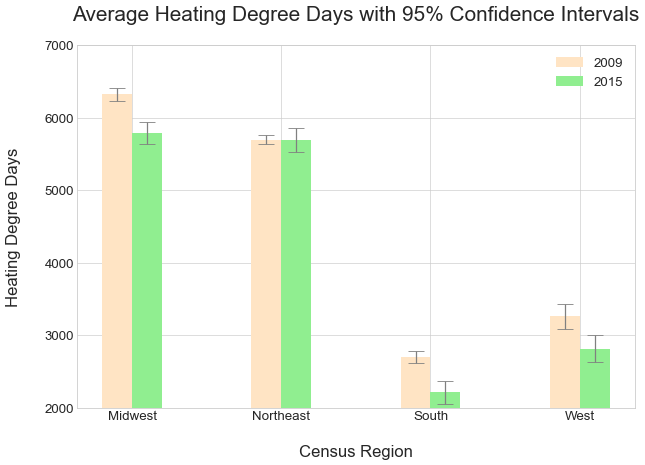

In [15]:
### Check the equality of indexes
assert hd_2009.index.equals(hd_2015.index)
index = hd_2009.index

### Bar plot with error bar
width = 0.2
x_range = range(4)
plt.bar([x - width / 2 for x in x_range], hd_2009['mean'], width, 
        yerr = z * hd_2009['se'].values, ecolor='grey', 
        color='bisque', capsize=10, label='2009')
plt.bar([x + width / 2 for x in x_range], hd_2015['mean'], width, 
        yerr = z * hd_2015['se'].values, ecolor='grey', 
        color='lightgreen', capsize=10, label='2015')

### Settings to polish the figure
plt.xticks(x_range, labels=index)
plt.ylim((2000, 7000))
plt.tick_params(labelsize=16)
plt.xlabel('Census Region', fontsize=20)
plt.ylabel('Heating Degree Days', fontsize=20)
plt.legend(fontsize=16)
ax = plt.gca()
ax.set_title('Average Heating Degree Days with 95% Confidence Intervals', 
             pad=30, fontsize=25)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.show()

This figure shows the average heating degree days with 
$95\%$ confidence intervals on different census regions. 

From the figure, we can see that the south region has the
smallest value on average heating degree days, the west region 
has the second smallest value. Situations are similar in midwest
and northwest, both have a relative large value on average heating 
degree days. This distribution conforms to the climate of each region.

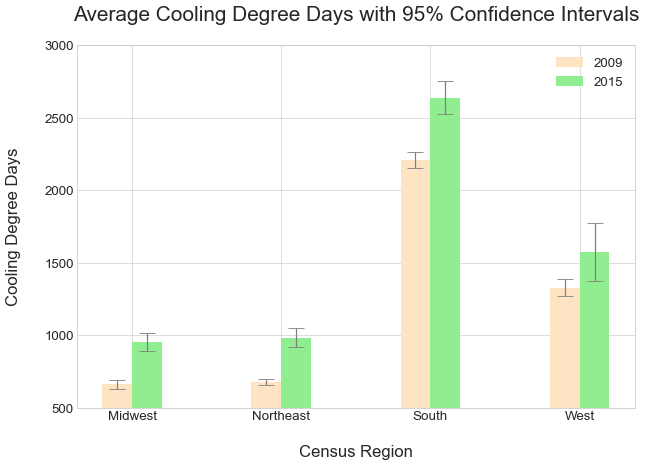

In [16]:
### Check the equality of indexes
assert cd_2009.index.equals(cd_2015.index)
index = cd_2009.index

### Bar plot with error bar
width = 0.2
x_range = range(4)
plt.bar([x - width / 2 for x in x_range], cd_2009['mean'], width, 
        yerr = z * cd_2009['se'].values, ecolor='grey', 
        color='bisque', capsize=10, label='2009')
plt.bar([x + width / 2 for x in x_range], cd_2015['mean'], width, 
        yerr = z * cd_2015['se'].values, ecolor='grey', 
        color='lightgreen', capsize=10, label='2015')

### Settings to polish the figure
plt.xticks(x_range, labels=index)
plt.ylim((500, 3000))
plt.tick_params(labelsize=16)
plt.xlabel('Census Region', fontsize=20)
plt.ylabel('Cooling Degree Days', fontsize=20)
plt.legend(fontsize=16)
ax = plt.gca()
ax.set_title('Average Cooling Degree Days with 95% Confidence Intervals', 
             pad=30, fontsize=25)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.show()

This figure shows the average cooling degree days with 
$95\%$ confidence intervals on different census regions. 

From the figure, we can see that the south region has the
largest value on average cooling degree days, the west region 
has the second largest value. Situations are similar in midwest
and northwest, both have a relative small value on average cooling 
degree days. This distribution conforms to the climate of each region.

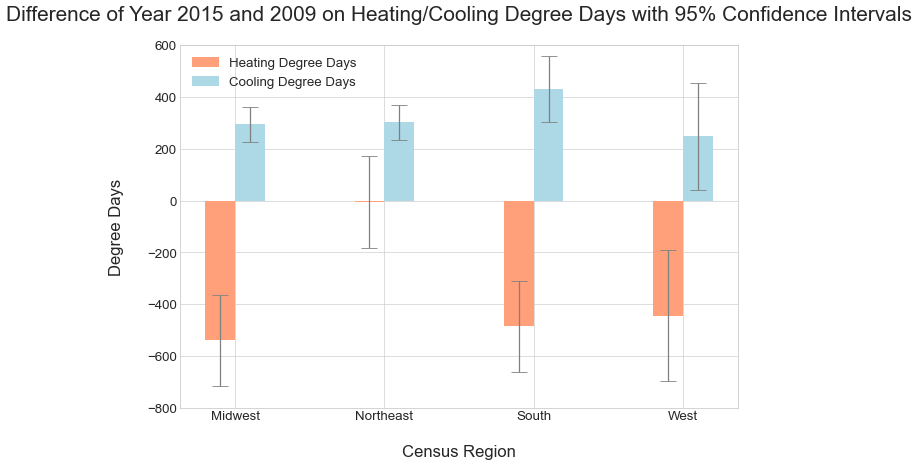

In [17]:
### Check the equality of indexes
assert hd_diff.index.equals(hd_diff.index)
index = hd_diff.index

### Bar plot with error bar
width = 0.2
x_range = range(4)
plt.bar([x - width / 2 for x in x_range], hd_diff['diff'], width, 
        yerr = z * hd_diff['se'].values, ecolor='grey', 
        color='lightsalmon', capsize=10, label='Heating Degree Days')
plt.bar([x + width / 2 for x in x_range], cd_diff['diff'], width, 
        yerr = z * cd_diff['se'].values, ecolor='grey', 
        color='lightblue', capsize=10, label='Cooling Degree Days')

### Settings to polish the figure
plt.xticks(x_range, labels=index)
plt.ylim((-800, 600))
plt.tick_params(labelsize=16)
plt.xlabel('Census Region', fontsize=20)
plt.ylabel('Degree Days', fontsize=20)
plt.legend(fontsize=16)
ax = plt.gca()
ax.set_title('Difference of Year 2015 and 2009 on '+
             'Heating/Cooling Degree Days with 95% Confidence Intervals', 
             pad=30, fontsize=25)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.show()

This figure shows the average difference on heating/cooling 
degree days between year 2015 and year 2009, with 
$95\%$ confidence intervals on different census regions.
The difference is computed by $value_{2015} - value_{2009}$.

From the figure, we can see that there is significant difference
on heating/cooling degree days between year 2015 and year 2009 
since almost all the $95\%$ confidence intervals do not contain $0$. 
From year 2009 to year 2015, most regions have increased average
cooling degree days and decreased heating degree days, this may due
to climate change.

The difference in heating degree days on northeast region do not 
have a significant change perhaps its temperature in 2009 is 
as cold as which in 2015, people still use heating equipment as
the same as in 2009.